In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_base = pd.read_csv("agent_47_base/train_stats.csv")
df = pd.read_csv("agent_47/train_stats.csv")

print("df sommaire")
display( df.describe() )

print("df valeurs manquantes")
display( df.isna().sum().to_frame().T )

print("df valeurs dupliqueess")
dup = df.duplicated(keep="last")
display( df[dup] )

df sommaire


,Id,Episode,EpisodeLength,Score,CumulativeReward,Epsilon,EpisodeMS
count,183.0,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,0.0,91.000000,50.918033,2.950820,227.595628,0.109280,362.324962
std,0.0,52.971691,42.635161,3.621181,344.686050,0.210585,285.969966
min,0.0,0.000000,2.000000,0.000000,-50.000000,0.000088,9.220000
25%,0.0,45.500000,12.000000,0.000000,-50.000000,0.000911,121.400000
50%,0.0,91.000000,41.000000,2.000000,100.000000,0.009394,265.873000
75%,0.0,136.500000,75.500000,5.000000,450.000000,0.096954,635.290500
max,0.0,182.000000,188.000000,15.000000,1450.000000,1.000000,985.747000


df valeurs manquantes


,Id,Episode,EpisodeLength,Score,CumulativeReward,Epsilon,EpisodeMS
0,0,0,0,0,0,0,0


df valeurs dupliqueess


,Id,Episode,EpisodeLength,Score,CumulativeReward,Epsilon,EpisodeMS


Max length: 15 at: 174


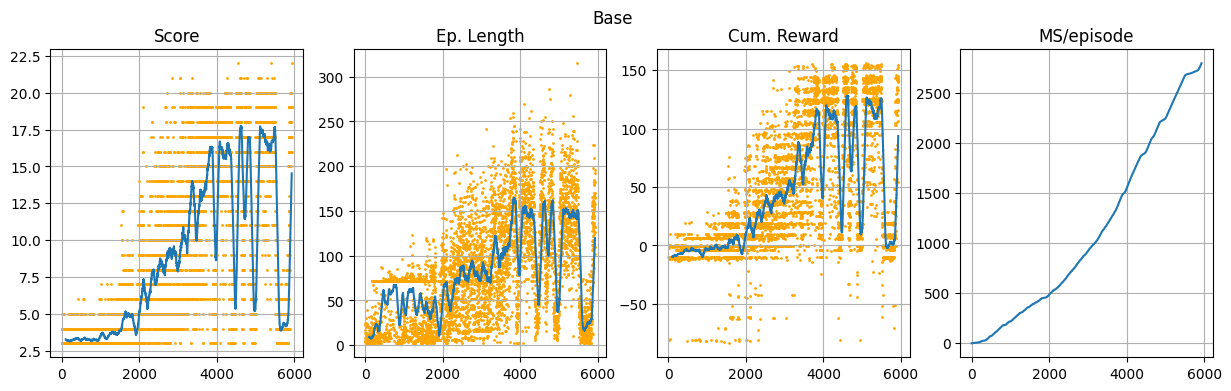

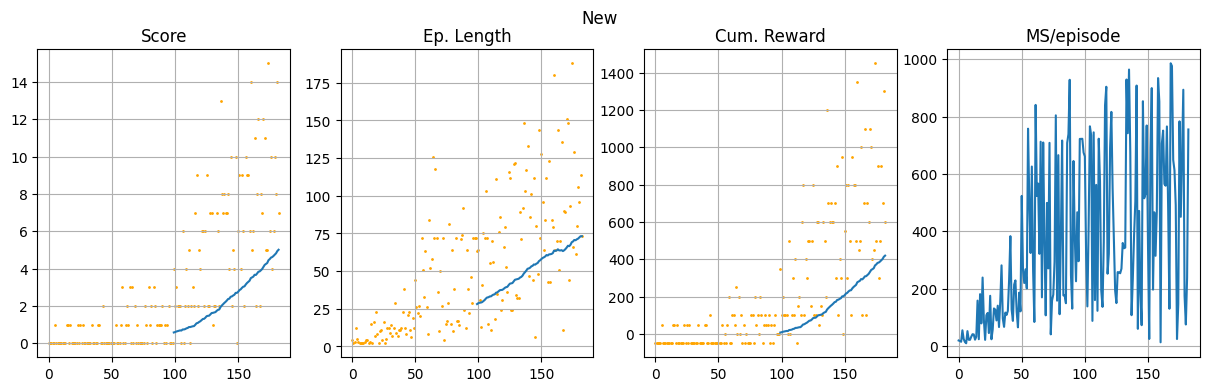

In [3]:
def graph(df, title, ROLLING=100):
    plt.figure(figsize=(15, 4))

    plt.subplot(141)
    plt.plot(df.Episode, df.Score.rolling(ROLLING).mean())
    plt.scatter(df.Episode, df.Score, s=1, color="orange")
    plt.title("Score")
    plt.grid()

    plt.subplot(142)
    plt.plot(df.Episode, df.EpisodeLength.rolling(ROLLING).mean())
    plt.scatter(df.Episode, df.EpisodeLength, s=1, color="orange")
    plt.title("Ep. Length")
    plt.grid()

    plt.subplot(143)
    if False:
        plt.plot(df.Episode, df.Epsilon)
        plt.title("Epsilon")
    else:
        plt.plot(df.Episode, df.CumulativeReward.rolling(ROLLING).mean())
        plt.scatter(df.Episode, df.CumulativeReward, s=1, color="orange")
        plt.title("Cum. Reward")
    plt.grid()

    plt.subplot(144)
    plt.plot(df.Episode, df.EpisodeMS)
    plt.title("MS/episode")
    plt.grid()

    plt.suptitle(title)
    plt.show()

print("Max score:", df.Score.max(), "at:", df.Score.argmax())

graph(df_base, "Base")
graph(df, "New")